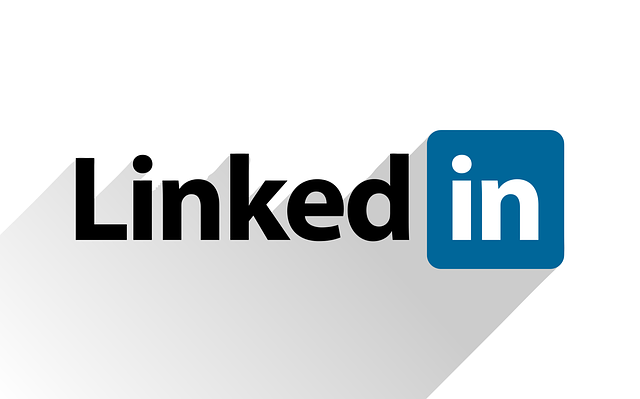

# **Getting Your Linkedin Data**

[Use this link  to see the guide.](https://www.linkedin.com/help/linkedin/answer/50191/downloading-your-account-data?lang=en).

A screenshot of this guide is included below.

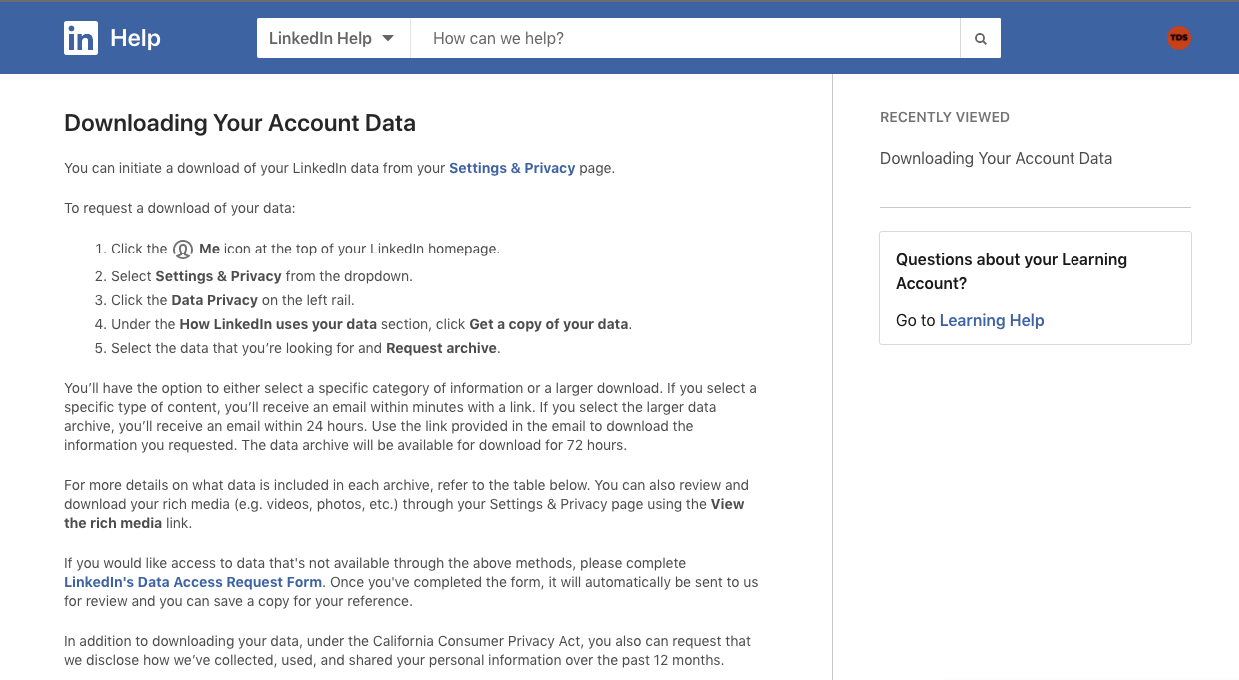

<br>

##**Select the data that you want to analyze**.


In this tutorial, we will be analyzing our connections data. Feel free to also analyze anythng else that you are curious about.

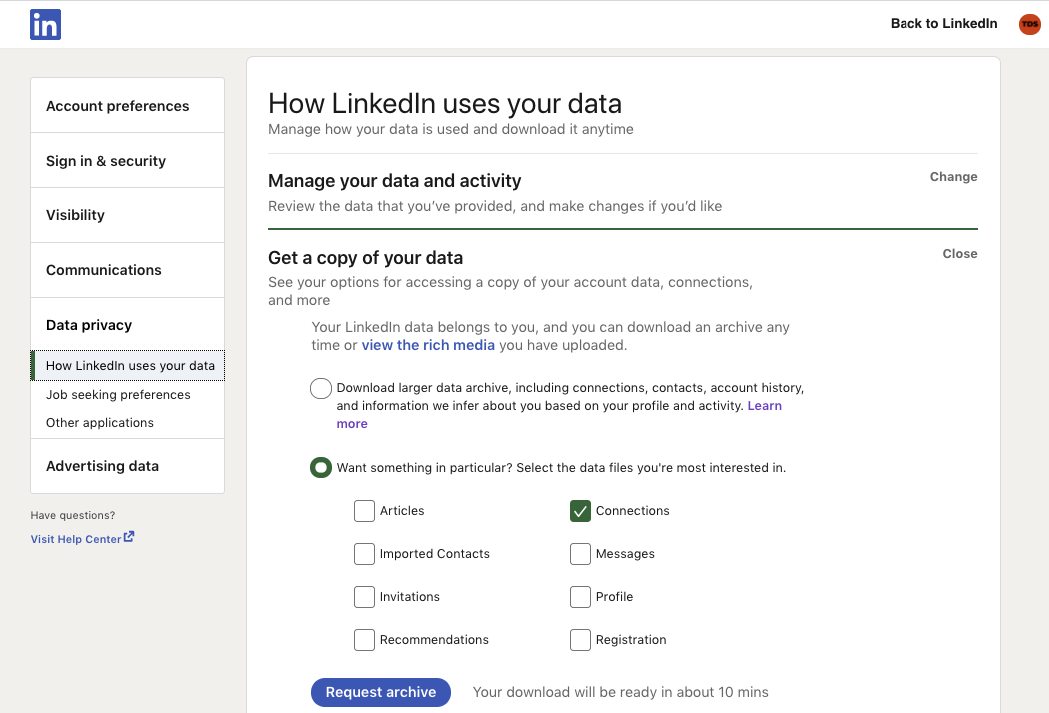

<br>

<br>

##**You can easily download your data as soon as it ready.**

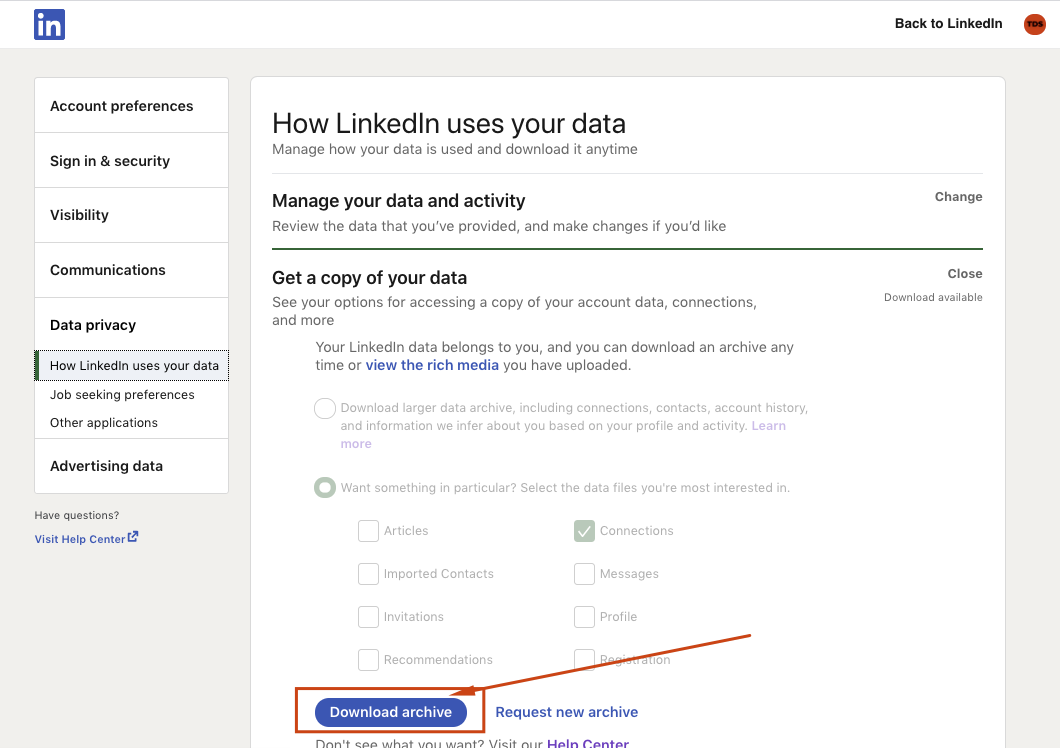

<br>

<br>

<br>

#**Import Libraries and Load Dataset**

In [ ]:
import pandas as pd
lkd=pd.read_csv('/content/Connections.csv')
lkd.head(20)

,First Name,Last Name,Email Address,Company,Position,Connected On
0,xSEO,Agency,NaN,xSEO Agency,Founder,16-Feb-21
1,Graham,Blue,NaN,Skillspot,Director Of Content Development,16-Feb-21
2,Jayant,Mali,NaN,NaN,NaN,09-Feb-21
3,Surya,Kazipeta,NaN,Blibli.com,Senior Product Manager,05-Feb-21
4,Gaurav,Khalase,NaN,NaN,NaN,05-Feb-21
5,Vaibhav Ranjit,Patil,NaN,Infosys,Analyst,03-Feb-21
6,Pranay,Kothari,NaN,Aureus Analytics,Analytics Engineer - Machine Learning,03-Feb-21
7,Y Charan,Tej Reddy,NaN,Malla Reddy University Hyderabad,Student,03-Feb-21
8,Bannour,Chaker,NaN,école de l' Aviation Borj el Amri,DATA SCIENTIST /Encadrant et Ingénieur système...,01-Feb-21
9,Anto Ovid,G S,NaN,Qtree Technologies - Cubik CADD,Civil Engineering Software Instructor,01-Feb-21


In [ ]:
lkd.shape

(8528, 6)

<br>

<br>


#**Insights**

<br>

<br>

#**Timeline**: How is my Connection activity overtime?

In [ ]:
lkd= lkd.sort_values(by='Connected On') #sort the values according to Connections


#make a line plot
time = px.line(lkd.groupby(by='Connected On').count().reset_index(), 
                           x="Connected On", 
                           y="First Name", 
                           labels={'First Name': 'Number Of Connections'},
                           title='Connection Timeline')
time.show()


<br>

<br>

#**Companies**: Where do my Connections work?

Let's analyze the **Company** column to know where our **Connecttions** are working.

In [ ]:
lkd['Company']

0                   xSEO Agency
1                     Skillspot
2                           NaN
3                    Blibli.com
4                           NaN
                 ...           
8523            Cinépolis India
8524    Ghana Revenue Authority
8525                Express KCS
8526                  Capgemini
8527                        NaN
Name: Company, Length: 8528, dtype: object

<br>

Let's use the **groupby()** function to group our data by the **Company** and use the **count()** function to count how many of our **Connections** work in the various companies.

In [ ]:
group_company = lkd.groupby(by='Company').count().reset_index()
group_company

,Company,First Name,Last Name,Email Address,Position,Connected On
0,Vsolv Engineering India Pvt Ltd,1,1,0,1,1
1,-,1,1,0,1,1
2,- Freelancer,1,1,0,1,1
3,--,1,1,0,1,1
4,AYN InfoTech Limited,1,1,0,1,1
...,...,...,...,...,...,...
4817,عبدالعال العجمي,1,1,0,1,1
4818,عمل مستقل,1,1,0,1,1
4819,データフォーシーズ,1,1,0,1,1
4820,字节跳动,1,1,0,1,1


<br>

Let's sort these values in descending order using the **sort_values()** function by setting **ascending=False**. We will sort it by the count of the **'Connected On'** column.

You can also sort it by any other variable like **First Name, Last Name** or **Position**.

In [ ]:
group_company=group_company.sort_values(by='Connected On', ascending=False).reset_index(drop=True)
group_company

,Company,First Name,Last Name,Email Address,Position,Connected On
0,Tata Consultancy Services,135,135,5,135,135
1,Amazon,78,78,1,78,78
2,Accenture,69,69,0,69,69
3,Cognizant,61,61,3,61,61
4,Infosys,61,61,2,61,61
...,...,...,...,...,...,...
4817,HCL Infosystems Ltd.,1,1,0,1,1
4818,HDFC Bank,1,1,0,1,1
4819,HDFC Bank Limited,1,1,0,1,1
4820,HDFC Limited,1,1,0,1,1


Let's use Plotly to visualise our data for better insights.

In [ ]:
import plotly.express as px
# import plotly.graph_objects as go

In [ ]:
fig = px.bar(group_company[:200],
      x='Company',
      y='Connected On',
      labels={'Connected On': 'Number Of Connections'}, 
      width=1000, height=900,
      title = 'Bar graph for Companies my connections are working at.')
fig

Now from the above, we can see all the companies that our connections are working at and also how many are working in each company. For instance, I can see that most of my connections are working at ***Tata Consultancy Services*** and so on...

You can hover on the ***bars*** to have a better view pf the individual companies and the number of connections working there. 

<br>

<br>

### Let's use **Tree Plot** in Plotly to have a better visualisation.

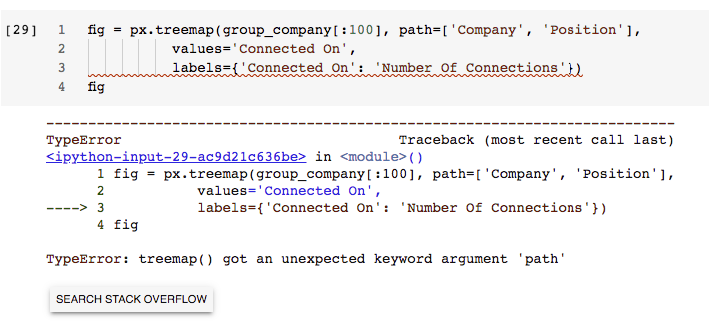

If you get the above error, try to **upgrade your plotly** using the command below:

In [ ]:
pip install --upgrade plotly

     |████████████████████████████████| 13.2MB 334kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
fig = px.treemap(group_company[:100], path=['Company', 'Position'],
          values='Connected On',
          labels={'Connected On': 'Number Of Connections'}, 
          width=1000, height=900,
          title = 'HeatMap for Companies where my connections are working')
fig

**Treemap** gives us a better view. The size of each ***company box*** represents the size of the connections working at that particular company.

You can hover on the ***boxes*** to have a better view pf the individual companies and the number of connections working there.

<br>

<br>

#**Positions**: Which Positions do my connections hold?

In [ ]:
lkd['Position'].value_counts()

Data Scientist                                         848
Data Analyst                                           335
Software Engineer                                      216
Senior Data Scientist                                  150
Machine Learning Engineer                              143
                                                      ... 
Owner, Business Consultant, Analyst, Macroeconomist      1
Researcher & Scientific Lead                             1
Data Scientist, R&D                                      1
Cloud Solution Architect-Data & AI                       1
Senior Machine Learning Engineer                         1
Name: Position, Length: 3376, dtype: int64

From the above, we can see that most of my connections are
**Data Scientist, Data Analyst ,Software Engineer, Senior Data Scientist ,Machine Learning Engineer**. 

There is a break after *Machine Learning Engineer*, so I can't really see all of my connections. Let's do something about it.

From below, am going to count all the number of positions and find the percentage of each each position, and also give a condition to make the selection (e.g. I can find all the positions that are having more than 20% connections). 

In [ ]:
lkd['Position'].value_counts()/len(lkd) * 100 >0.2

Data Scientist                                          True
Data Analyst                                            True
Software Engineer                                       True
Senior Data Scientist                                   True
Machine Learning Engineer                               True
                                                       ...  
Owner, Business Consultant, Analyst, Macroeconomist    False
Researcher & Scientific Lead                           False
Data Scientist, R&D                                    False
Cloud Solution Architect-Data & AI                     False
Senior Machine Learning Engineer                       False
Name: Position, Length: 3376, dtype: bool

<br>

Am not interested in the **True** or **False**, so let me add the above two codes in one so that I will get the actual count of the positions and the job title. 

In [ ]:
lkd['Position'].value_counts()[lkd['Position'].value_counts()/len(lkd) * 100 >0.2]

Data Scientist                      848
Data Analyst                        335
Software Engineer                   216
Senior Data Scientist               150
Machine Learning Engineer           143
Senior Software Engineer             98
Business Analyst                     95
Python Developer                     91
Data Engineer                        89
Data Science Intern                  80
Analyst                              67
Senior Data Analyst                  62
Intern                               57
Senior Analyst                       54
Founder                              54
Software Developer                   53
Lead Data Scientist                  49
Consultant                           49
Student                              45
Associate Software Engineer          41
Co-Founder                           41
Associate                            38
Assistant Manager                    34
Senior Business Analyst              32
Research Analyst                     31


Now it looks much better!! 


In [ ]:
fig = px.bar(lkd.groupby(by='Position').count().sort_values(by='First Name', ascending=False)[:50].reset_index(),
       x='Position',
       y='Connected On',
       labels={'Connected On': 'Number Of Connections'},
        title= 'The Various Positions Occupied By My LinkedIn Network'
      )

fig.show()

We can see the various positions and the number of connections holding these positions.

<br>

<br>

#**WordCloud** Visualisation

In [ ]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline


def CreateWordCloud(text):
    
    
    wordcloud = WordCloud(width = 1000, height = 900, 
                background_color='black',
                min_font_size = 10,
                colormap='Set2').generate(text) 
    
    
    fig = plt.figure(figsize = (15, 10)) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    # plt.axis("off") 
    # plt.tight_layout(pad = 0) 

    plt.show() 
    
    return fig

In [ ]:
positions = ' '.join(lkd[~lkd.Position.isnull()].Position.unique())

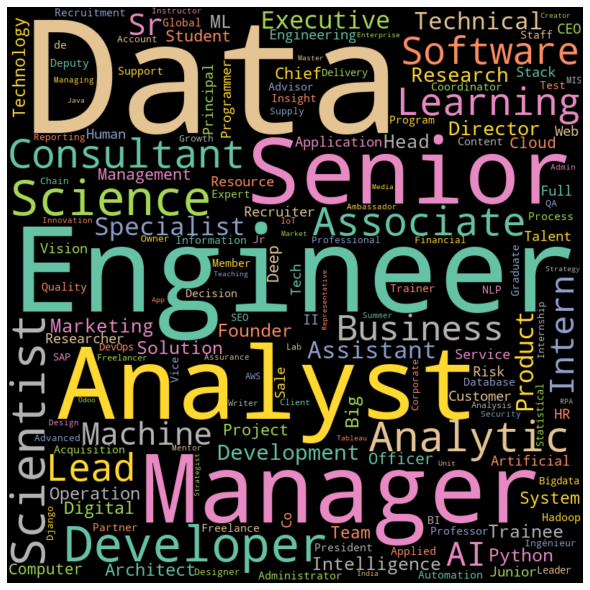

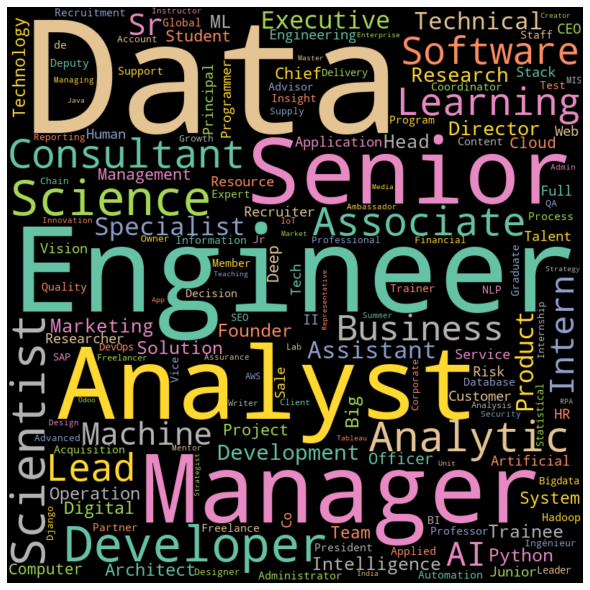

In [ ]:
wordcloud = make_wordcloud(positions)
wordcloud


#**Conclusion**:

Now in this tutorial, we have used the **Connections** data and analyse it and drawn some insights from it.

You can download any different type of your Linkedin data and perform similar analysis.

In the [Data Science and Machine Learning Course](https://bit.ly/3nlqfk2.), we will learn more advanced analysis and even deploy our projects live in production just like it is done in the real world industry.

We will also learn industry level data processing using Python in the [Python Data Analysis for Data Science and Machine Learning Course](https://bit.ly/2YF7hKi)